In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
datasets = {}

for dataset in ('geyser', 'chips'):
    df = pd.read_csv(f'data/{dataset}.csv')
    df["class"] = df["class"].replace(["P", "N"], [1, -1])
    X = df[["x", "y"]].to_numpy()
    y = df[["class"]].to_numpy()[:, 0]
    
    datasets[dataset] = (X, y)

In [3]:
class Node:
    def __init__(self, feature_id, threshold, left, right):
        self.feature_id = feature_id
        self.threshold = threshold
        self.left = left
        self.right = right
            
    def predict(self, x):
        # print(x[self.feature_id], self.threshold)
        if x[self.feature_id] < self.threshold:
            return self.left.predict(x)
        else:
            return self.right.predict(x)

class Leaf:
    def __init__(self, class_id):
        self.class_id = class_id
            
    def predict(self, _):
        return self.class_id

In [4]:
import seaborn as sns

def plot_clf(model, X, y, idx = None):
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    if idx is None:
        Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
    else:
        Z = np.array(model.predict_prefix(np.c_[xx.ravel(), yy.ravel()], idx))
        
    Z = Z.reshape(xx.shape)
    #plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z)

    sns.scatterplot(
            x=X[:, 0],
            y=X[:, 1],
            hue=y,
            alpha=1.0,
            edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

0.9234234234234234


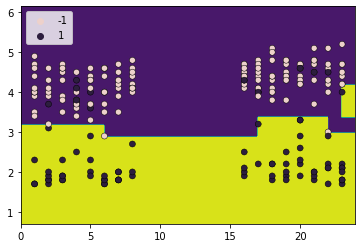

0.864406779661017


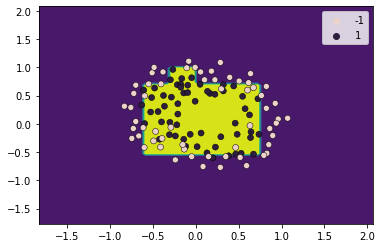

In [6]:
from decision_tree import *
from sklearn.metrics import accuracy_score

for dataset, (X, y) in datasets.items():
    model = DecisionTree(5)
    model.fit(X, y)
    print(accuracy_score(model.predict(X), y))
    plot_clf(model, X, y)
    plt.show()

### Random Forest

0.918918918918919


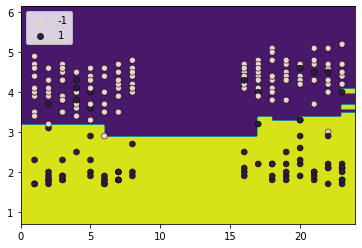

0.8898305084745762


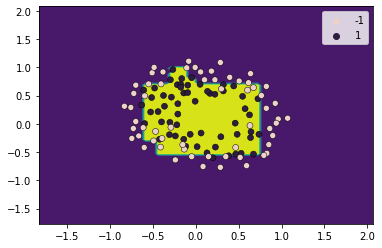

In [8]:
from random_forest import RandomForestClassifier
import seaborn as sns

for dataset, (X, y) in datasets.items():
    model = RandomForestClassifier(100)
    model.fit(X, y)
    print(accuracy_score(model.predict(X), y))
    plot_clf(model, X, y)
    plt.show()

### AdaBoost

0.9009009009009009


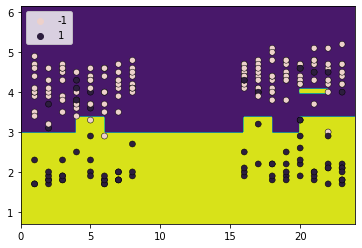

0.864406779661017


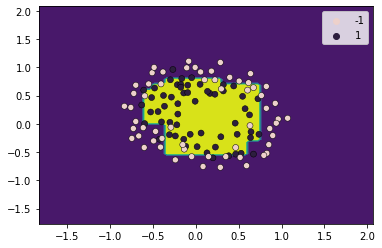

In [10]:
from ada_boost import AdaBoost

for dataset, (X, y) in datasets.items():
    model = AdaBoost(DecisionTree(max_depth=1), 100)
    model.fit(X, y)
    print(accuracy_score(model.predict(X), y))
    plot_clf(model, X, y)
    plt.show()

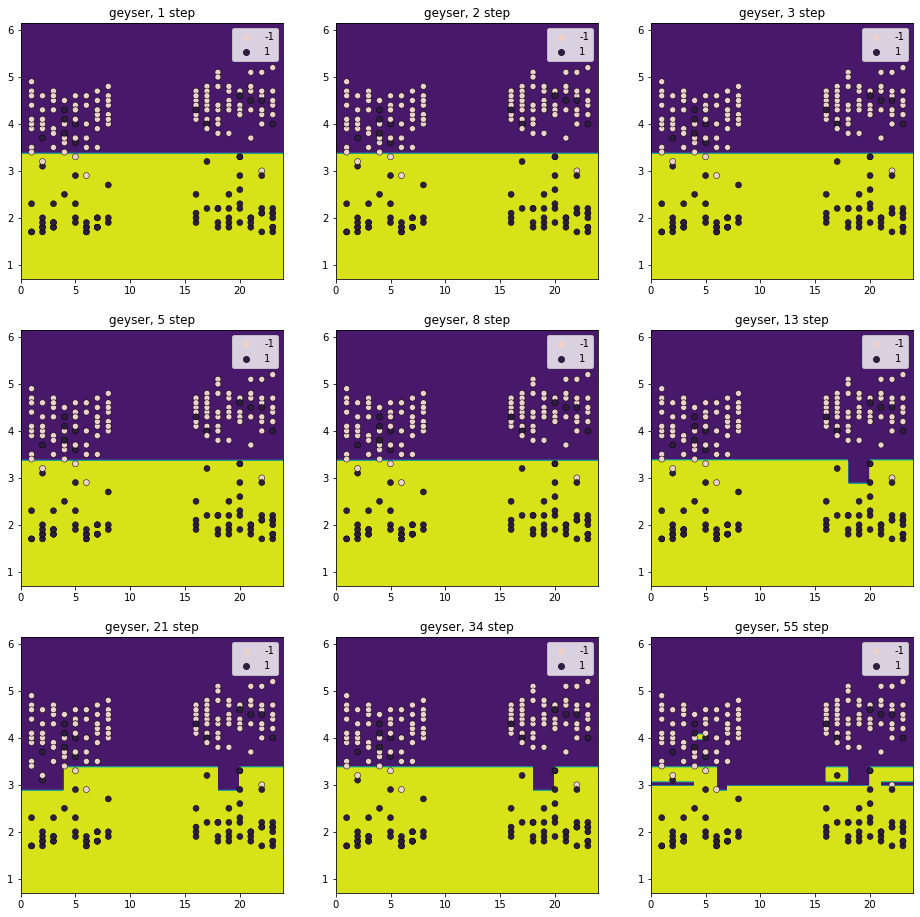

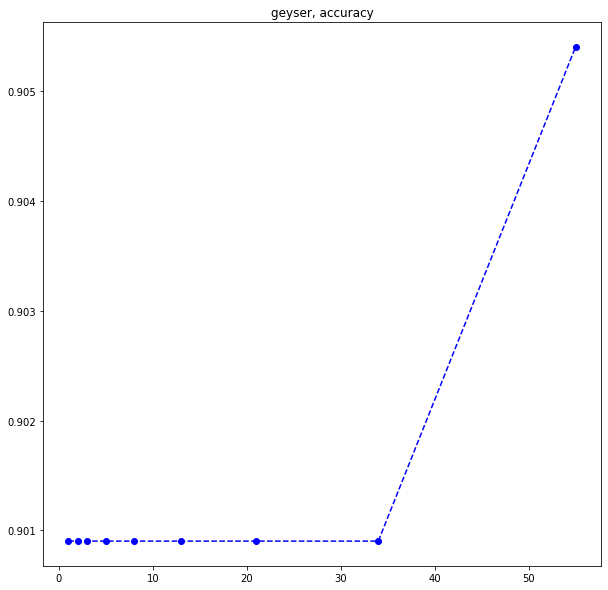

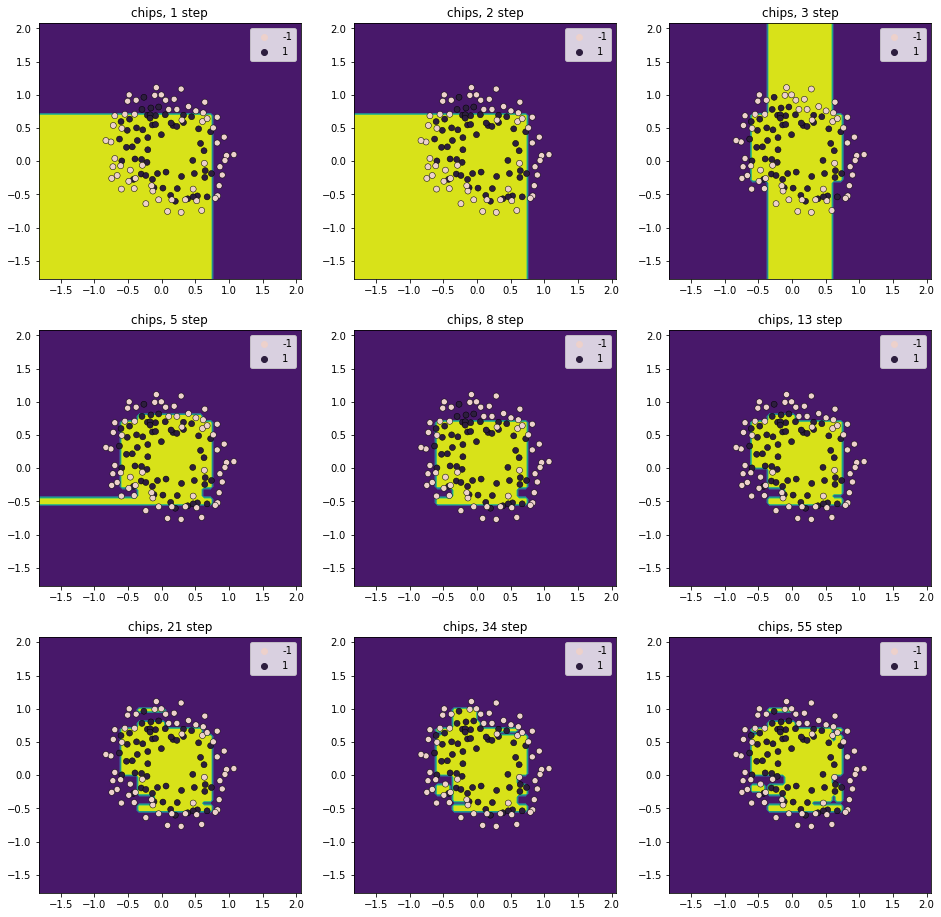

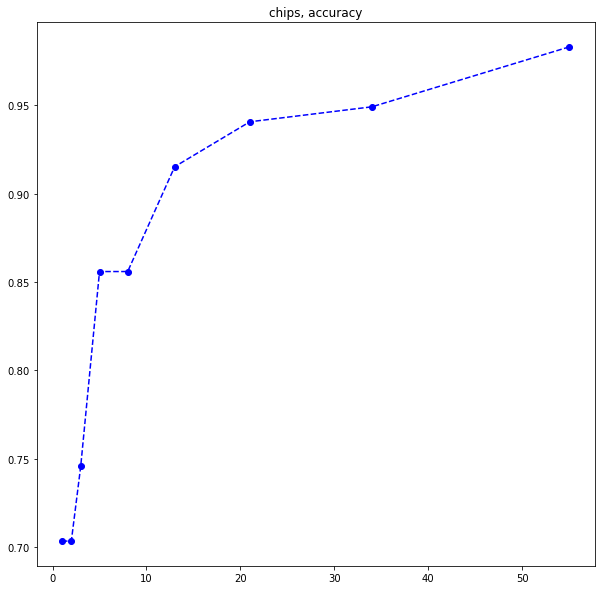

In [13]:
for dataset, (X, y) in datasets.items():
    model = AdaBoost(DecisionTree(max_depth=2), 100)
    model.fit(X, y)
    
    fig = plt.figure(figsize=(16, 16))
    columns = 3
    rows = 3
    idxs = (1, 2, 3, 5, 8, 13, 21, 34, 55)
    scores = []
    for i in range(len(idxs)):
        fig.add_subplot(rows, columns, i + 1)
        plot_clf(model, X, y, idxs[i])
        plt.title(f"{dataset}, {idxs[i]} step")
        scores.append(accuracy_score(model.predict_prefix(X, idxs[i]), y))
    fig = plt.figure(figsize=(10, 10))
    plt.plot(idxs, scores, '--bo')
    plt.title(f"{dataset}, accuracy")